# Package Management

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error

# Load Data Set

In [7]:
salary = pd.read_csv('data\\Salary_dataset.csv')
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [8]:
salary.drop(columns = ['Unnamed: 0'], axis = 1, inplace = True)

In [9]:
salary.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


# Exploration

In [10]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


Observation:
- Experience and Salary are not on the same scale -this will need to be scaled.
- Salary field does not follow uniform distribution.
- Experience Years also do not have uniqform distribution.
- We can use log on both fields to scale or directly use StandardScaler which will bring mean to 0 and std to 1.

array([[<Axes: title={'center': 'Salary'}>]], dtype=object)

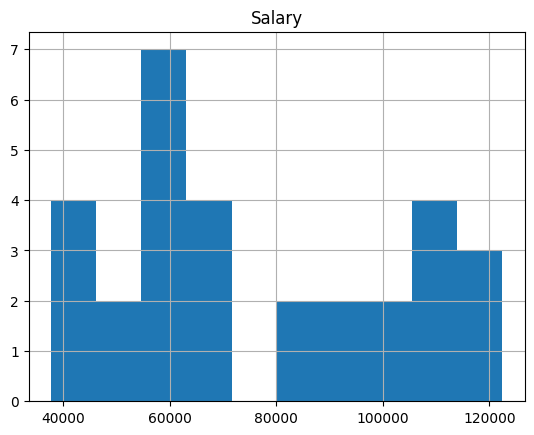

In [11]:
salary.hist('Salary')

array([[<Axes: title={'center': 'YearsExperience'}>]], dtype=object)

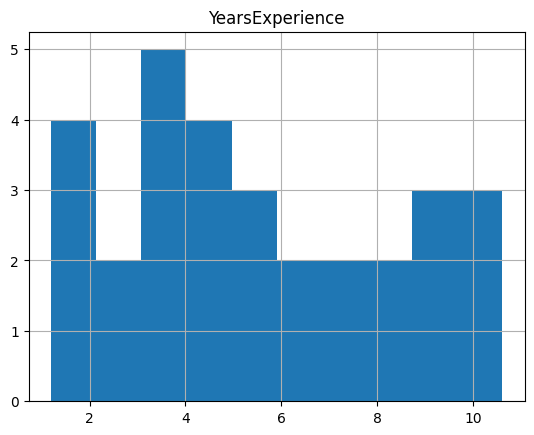

In [12]:
salary.hist('YearsExperience')

# Data Preparation

In [13]:
salary.sample(5)

,YearsExperience,Salary
10,4.0,63219.0
12,4.1,56958.0
4,2.3,39892.0
27,9.7,112636.0
7,3.3,54446.0


In [14]:
X = salary['YearsExperience'].to_frame()
y = salary['Salary']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24, 1), (6, 1), (24,), (6,))

# Model Training

In [16]:
lr = LinearRegression()
ridge = Ridge(alpha = 0.1)
lasso = Lasso(alpha = 0.1)

In [17]:
lr_model = lr.fit(X_train, y_train)
ridge_model = ridge.fit(X_train, y_train)
lasso_model = lasso.fit(X_train, y_train)

# Prediction

In [18]:
lr_pred = lr_model.predict(X_test)
ridge_pred = ridge_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)

# Evaluation

In [19]:
lr_rmse = root_mean_squared_error(y_test, lr_pred)
ridge_rmse = root_mean_squared_error(y_test, ridge_pred)
lasso_rmse = root_mean_squared_error(y_test, lasso_pred)

lr_rmse, ridge_rmse, lasso_rmse

(7059.043621901506, 7059.991269048929, 7059.046013344014)

Observation:
- Linear Regression is doing better.
- Lasso is doing slightly better than ridge.

In [20]:
pd.DataFrame([lr_model.coef_,ridge_model.coef_, lasso_model.coef_], columns = X_train.columns)

,YearsExperience
0,9423.815323
1,9419.087488
2,9423.803276


# Pipeline Creation

In [21]:
from sklearn.pipeline import Pipeline

In [22]:
lr_pipeline = Pipeline([
    ('lr', LinearRegression())
])

ridge_pipeline = Pipeline([
    ('ridge', Ridge(alpha = 0.1))
])

lasso_pipeline = Pipeline([
    ('lasso', Lasso(alpha = 0.1))
])

In [23]:
lr_pipeline.fit(X_train, y_train)
ridge_pipeline.fit(X_train, y_train)
lasso_pipeline.fit(X_train, y_train)

,steps,"[('lasso', ...)]"
,transform_input,None
,memory,None
,verbose,False
,alpha,0.1
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False


In [24]:
lr_pipeline_pred = lr_pipeline.predict(X_test)
ridge_pipeline_pred = ridge_pipeline.predict(X_test)
lasso_pipeline_pred = lasso_pipeline.predict(X_test)

In [25]:
lr_pipeline_rmse = root_mean_squared_error(y_test, lr_pipeline_pred)
ridge_pipeline_rmse = root_mean_squared_error(y_test, ridge_pipeline_pred)
lasso_pipeline_rmse = root_mean_squared_error(y_test, lasso_pipeline_pred)

In [26]:
pd.DataFrame([lr_pipeline_rmse, ridge_pipeline_rmse, lasso_pipeline_rmse], columns = X_train.columns)

,YearsExperience
0,7059.043622
1,7059.991269
2,7059.046013


# With Scaling

## Model Training

In [31]:
from sklearn.pipeline import Pipeline

In [32]:
lr_pipeline = Pipeline([
   ("scalar", StandardScaler()),
   ("lr", LinearRegression()) 
])

ridge_pipeline = Pipeline([
    ("scalar", StandardScaler()),
    ("ridge", Ridge(alpha = 0.1))
])

lasso_pipeline = Pipeline([
    ("scalar", StandardScaler()),
    ("lasso", Lasso(alpha = 0.1))
])

In [35]:
lr_pipeline.fit(X_train, y_train)
ridge_pipeline.fit(X_train, y_train)
lasso_pipeline.fit(X_train, y_train)

,steps,"[('scalar', ...), ('lasso', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,alpha,0.1
,fit_intercept,True
,precompute,False
,copy_X,True


In [37]:
lr_pipeline_pred = lr_pipeline.predict(X_test)
ridge_pipeline_pred = ridge_pipeline.predict(X_test)
lasso_pipeline_pred = ridge_pipeline.predict(X_test)

In [38]:
lr_pipeline_pred, ridge_pipeline_pred, lasso_pipeline_pred

(array([115791.21011287,  71499.27809463, 102597.86866063,  75268.80422384,
         55478.79204548,  60190.69970699]),
 array([115618.66826593,  71510.52019797, 102480.07096909,  75264.40513992,
         55556.50919466,  60248.86537211]),
 array([115618.66826593,  71510.52019797, 102480.07096909,  75264.40513992,
         55556.50919466,  60248.86537211]))

In [40]:
pd.DataFrame([lr_pipeline_pred, ridge_pipeline_pred, lasso_pipeline_pred])

,0,1,2,3,4,5
0,115791.210113,71499.278095,102597.868661,75268.804224,55478.792045,60190.699707
1,115618.668266,71510.520198,102480.070969,75264.405140,55556.509195,60248.865372
2,115618.668266,71510.520198,102480.070969,75264.405140,55556.509195,60248.865372


In [45]:
X_test

,YearsExperience
27,9.7
15,5.0
23,8.3
17,5.4
8,3.3
9,3.8


In [50]:
lr_pipeline_rmse = root_mean_squared_error(y_test, lr_pipeline_pred)
ridge_pipeline_rmse = root_mean_squared_error(y_test, ridge_pipeline_pred)
lasso_pipeline_rmse = root_mean_squared_error(y_test, lasso_pipeline_pred)

In [80]:
summary_df = pd.DataFrame({
    "Actual":y_test,
    "linear regression": lr_pipeline_pred,
    "ridge model": ridge_pipeline_pred,
    "lasso model": lasso_pipeline_pred,
})

In [83]:
summary_df.loc['RMSE'] = [
    "-",
    lr_pipeline_rmse,
    ridge_pipeline_rmse,
    lasso_pipeline_rmse
]

In [84]:
summary_df

,Actual,linear regression,ridge model,lasso model
27,112636.0,115791.210113,115618.668266,115618.668266
15,67939.0,71499.278095,71510.520198,71510.520198
23,113813.0,102597.868661,102480.070969,102480.070969
17,83089.0,75268.804224,75264.405140,75264.405140
8,64446.0,55478.792045,55556.509195,55556.509195
9,57190.0,60190.699707,60248.865372,60248.865372
RMSE,-,7059.043622,7067.429233,7067.429233


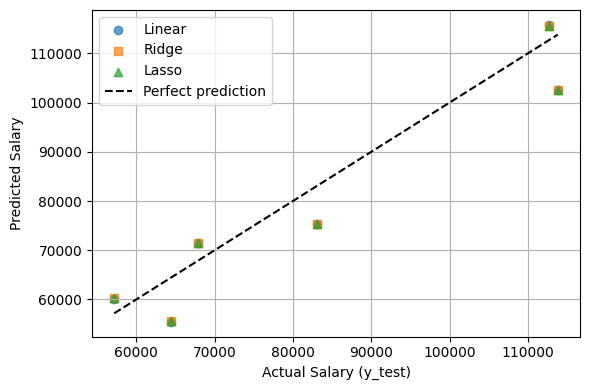

In [87]:
plt.figure(figsize=(6, 4))

# Scatter for each model
plt.scatter(y_test, lr_pipeline_pred,   label="Linear",  alpha=0.7)
plt.scatter(y_test, ridge_pipeline_pred, label="Ridge",  marker="s", alpha=0.7)
plt.scatter(y_test, lasso_pipeline_pred, label="Lasso", marker="^", alpha=0.7)

# Perfect prediction line (y = x)
min_val = y_test.min()
max_val = y_test.max()
plt.plot([min_val, max_val], [min_val, max_val], "k--", label="Perfect prediction")

plt.xlabel("Actual Salary (y_test)")
plt.ylabel("Predicted Salary")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [88]:
errors_df = pd.DataFrame({
    "Actual": y_test.values,
    "LR": lr_pipeline_pred,
    "Ridge": ridge_pipeline_pred,
    "Lasso": lasso_pipeline_pred
})

# Absolute errors
errors_df["LR_err"]    = (errors_df["LR"]    - errors_df["Actual"]).abs()
errors_df["Ridge_err"] = (errors_df["Ridge"] - errors_df["Actual"]).abs()
errors_df["Lasso_err"] = (errors_df["Lasso"] - errors_df["Actual"]).abs()


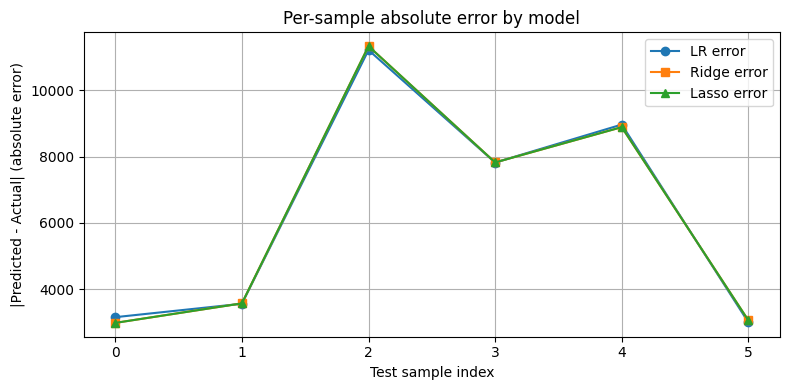

In [89]:
plt.figure(figsize=(8, 4))

idx = range(len(errors_df))  # 0..n_test-1

plt.plot(idx, errors_df["LR_err"],    "-o", label="LR error")
plt.plot(idx, errors_df["Ridge_err"], "-s", label="Ridge error")
plt.plot(idx, errors_df["Lasso_err"], "-^", label="Lasso error")

plt.xlabel("Test sample index")
plt.ylabel("|Predicted - Actual| (absolute error)")
plt.title("Per-sample absolute error by model")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


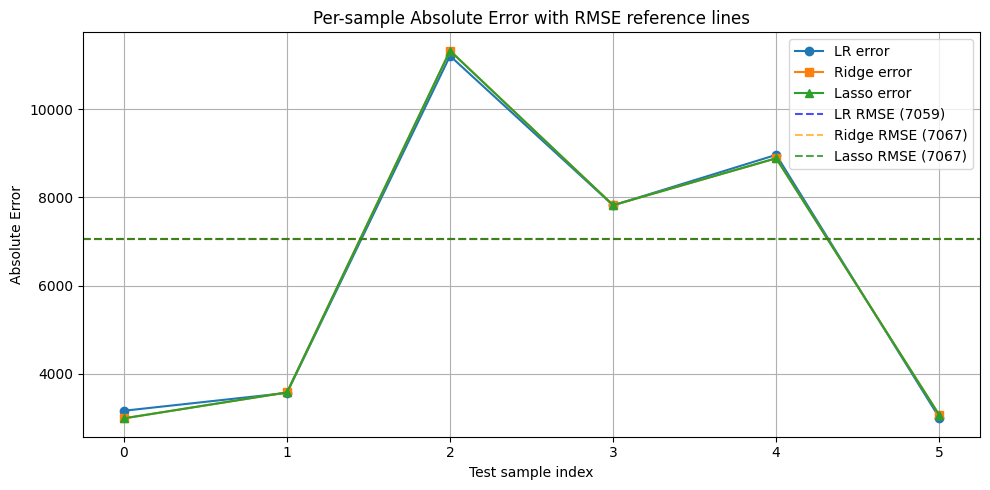

In [90]:
plt.figure(figsize=(10, 5))

idx = range(len(errors_df))  # sample index for test set

# Error lines per model
plt.plot(idx, errors_df["LR_err"],    "-o", label="LR error")
plt.plot(idx, errors_df["Ridge_err"], "-s", label="Ridge error")
plt.plot(idx, errors_df["Lasso_err"], "-^", label="Lasso error")

# RMSE reference lines
plt.axhline(lr_pipeline_rmse, color='blue',  linestyle='--', alpha=0.7, label=f"LR RMSE ({lr_pipeline_rmse:.0f})")
plt.axhline(ridge_pipeline_rmse, color='orange', linestyle='--', alpha=0.7, label=f"Ridge RMSE ({ridge_pipeline_rmse:.0f})")
plt.axhline(lasso_pipeline_rmse, color='green', linestyle='--', alpha=0.7, label=f"Lasso RMSE ({lasso_pipeline_rmse:.0f})")

plt.xlabel("Test sample index")
plt.ylabel("Absolute Error")
plt.title("Per-sample Absolute Error with RMSE reference lines")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
